# Moving Average Convergence Divergence Demo

In this notebook, we will demonstrate how the moving average convergence divergence (MACD) tool works. We will plot exponential moving average (EMA) lines of different periods, and see how they can be used to produce a new metric that can predict a crossover event.

[Moving Averages on Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

[MACD on Wikipedia](https://en.wikipedia.org/wiki/MACD)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import functions from a separate file: macdHelperFunctions.py
from EMAHelperFunctions import *


## MACD Function

In [2]:
# Given the signal data and the 3 periods, calculate all of the indicators.
def getMACD(signal_data, ema_short_period, ema_long_period, macd_signal_period):
    
    # Create timeline
    x = np.arange(len(signal_data))
    
    # Calculate Exponential Moving Averages
    ema_short_data = getEMAdataset(signal_data, ema_short_period)
    ema_long_data  = getEMAdataset(signal_data, ema_long_period)
    
    # Calculate MACD
    MACD = ema_short_data - ema_long_data
    # for all initial values leading to the EMA_long_period, make zero.
    # This cleans up the initial "spin-up" error.
    MACD[0:ema_long_period - 1] = 0
    
    # Calculate EMA of the MACD
    MACD_signal = getEMAdataset(MACD, macd_signal_period)
    
    # Calculate MACD difference, which is plotted as a bar chart.
    MACD_bars = MACD - MACD_signal
    
    # Return Everything
    return x, ema_short_data, ema_long_data, MACD, MACD_signal, MACD_bars


## Plotting Function

In [3]:
# MACD Plotter
def plotMACD(x, MACD_data, MACD_signal_data, macd_signal_period, MACD_hist, plot_x_start, plot_x_end):
    plt.plot(x, MACD_data, color='blue')
    plt.plot(x, MACD_signal_data, color='red')
    plt.bar(x, MACD_hist, color='black')
    #plt.axhline(y=0.0, color='k', linestyle='--')
    legend_text_1 = "MACD"   
    legend_text_2 = "MACD_signal(" + str(macd_signal_period) + ")"
    legend_text_3 = "MACD_hist"
    plt.legend([legend_text_1, legend_text_2, legend_text_3])
    plt.title("MACD and MACD_signal")
    plt.grid(b=True, which='major', color='gray', linestyle=':')
    plt.xlim((plot_x_start, plot_x_end))
    plt.show()

## Result Plots

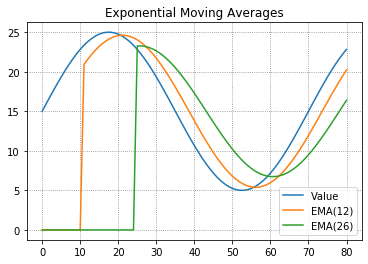

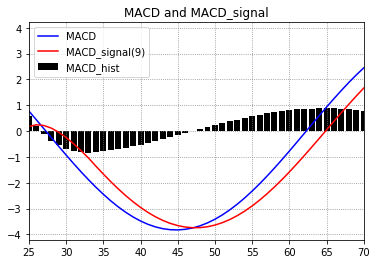

In [4]:
# Sine Wave Inputs
period = 70.0
amplitude = 20.0
sigma = 15.0
start = 0.0
end = 80.0
sineData = generateSineWave(period, amplitude, sigma, end)

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9

# MACD Plotting Parameters
plot_x_start = 25
plot_x_end = 70

# Function Calls
calculateAndPlotEMA(sineData, ema_short_period, ema_long_period)
x, my_short_data, my_long_data, myMACD, myMACD_signal, myMACD_hist = getMACD(sineData, ema_short_period, ema_long_period, macd_signal_period)
plotMACD(x, myMACD, myMACD_signal, macd_signal_period, myMACD_hist, plot_x_start, plot_x_end)


In the figures above, we see the MACD(12) and MACD(26) following the value signal.

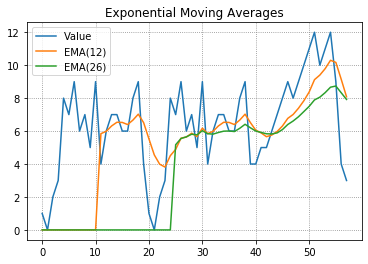

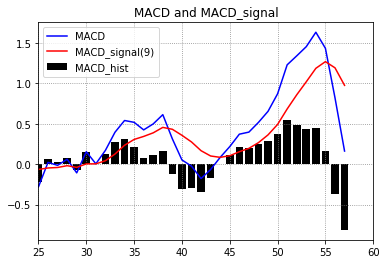

In [5]:
# Using some fictional data.
finalData = np.array([1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4, 
           1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4,
           4, 5, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 10, 11, 12, 9, 4, 3])

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9


# MACD Plotting Parameters
plot_x_start = 25
plot_x_end = 60

# Function Calls
calculateAndPlotEMA(finalData, ema_short_period, ema_long_period)
x, my_short_data, my_long_data, myMACD, myMACD_signal, myMACD_hist = getMACD(finalData, ema_short_period, ema_long_period, macd_signal_period)
plotMACD(x, myMACD, myMACD_signal, macd_signal_period, myMACD_hist, plot_x_start, plot_x_end)


## Function Testing Suite

In [6]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_getMACD(self):
        value_data = np.array([10, 11, 10, 12, 12, 12, 12, 11, 11, 10])
        
        # MACD Parameters
        ema_short_period = 1
        ema_long_period = 2
        macd_signal_period = 2
        
        # Run Calculations
        x, short_data, long_data, MACD, MACD_signal, MACD_bars = getMACD(value_data, ema_short_period, ema_long_period, macd_signal_period)
        
        # Check Answers
        x_ans = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
        self.assertTrue(np.allclose(x, x_ans))
        
        short_data_ans = np.array([10, 11, 10, 12, 12, 12, 12, 11, 11, 10])
        self.assertTrue(np.allclose(short_data, short_data_ans))
        
        long_data_ans = np.array([ 0., 10.75, 10.25, 11.5,  12., 12., 12., 11.25, 11., 10.25])
        self.assertTrue(np.allclose(long_data, long_data_ans))
        
        MACD_ans = np.array([0, 0.25, -0.25, 0.5, 0, 0, 0, -0.25, 0, -0.25])
        self.assertTrue(np.allclose(MACD, MACD_ans))
        
        MACD_signal_ans = np.array([0, 0.1875, -0.125, 0.3125, 0.125, 0, 0, -0.1875, -0.0625, -0.1875])
        self.assertTrue(np.allclose(MACD_signal, MACD_signal_ans))
        
        MACD_bars_ans = np.array([0, 0.0625, -0.125, 0.1875, -0.125, 0, 0, -0.0625, 0.0625, -0.0625])
        self.assertTrue(np.allclose(MACD_bars, MACD_bars_ans))
        
# Run the tests.
unittest.main(argv=[''], verbosity=2, exit=False)           

test_getMACD (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
